### Aterrizajes y despegues procesados por la Administración Nacional de Aviación Civil (ANAC) en el año 2021
#### Ejercicio de análisis de datos realizado en Python.  
1. El archivo que contiene los datos se puede descargar desde aquí: https://datos.gob.ar/dataset/transporte-aterrizajes-despegues-procesados-por-administracion-nacional-aviacion-civil-anac
2. El archivo usado contiene un listado de los distintos vuelos realizados en el año 2021, en Argentina.
3. Usé Jupyter Netbook (Anaconda3) y las librerias Pandas, Numpy y MatPlotLib.  
4. Usé los datos para realizar distintas clases de gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vuelosArgentina=pd.read_excel("202111-informe-ministerio.xlsx")
#vuelosArgentina

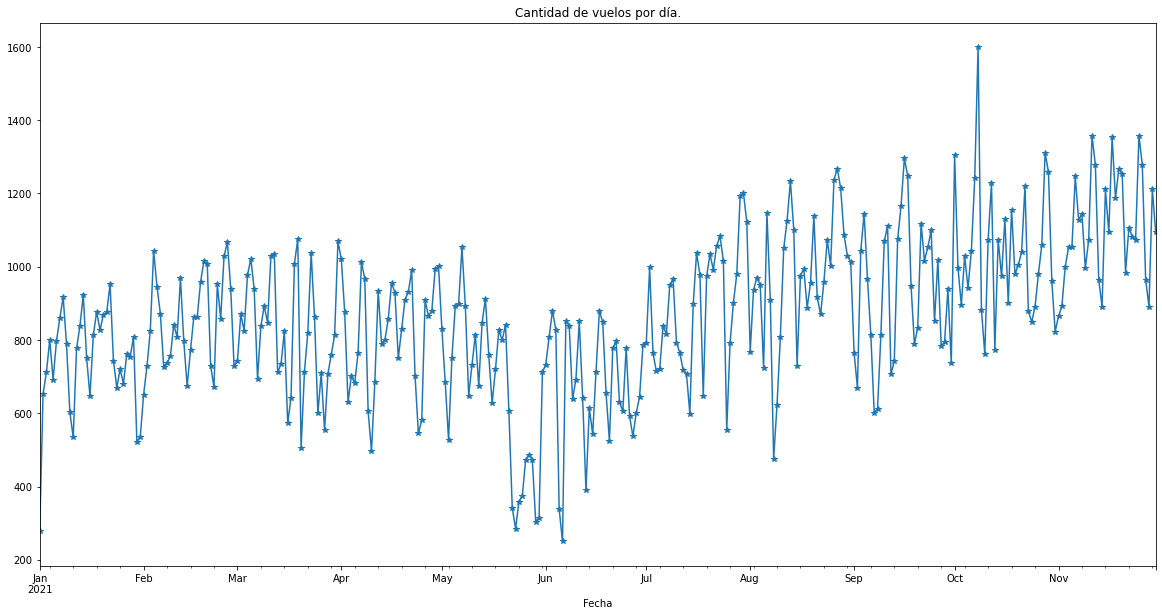

In [3]:
##Aquí mostraré la cantidad de vuelos realizado por día
vuelosAeropuertos=vuelosArgentina.groupby("Fecha")["Clasificación Vuelo"].count()
vuelosAeropuertos

vuelosAeropuertos.plot(kind="line",figsize=(20,10),marker="*")
plt.title("Cantidad de vuelos por día.")
plt.show()

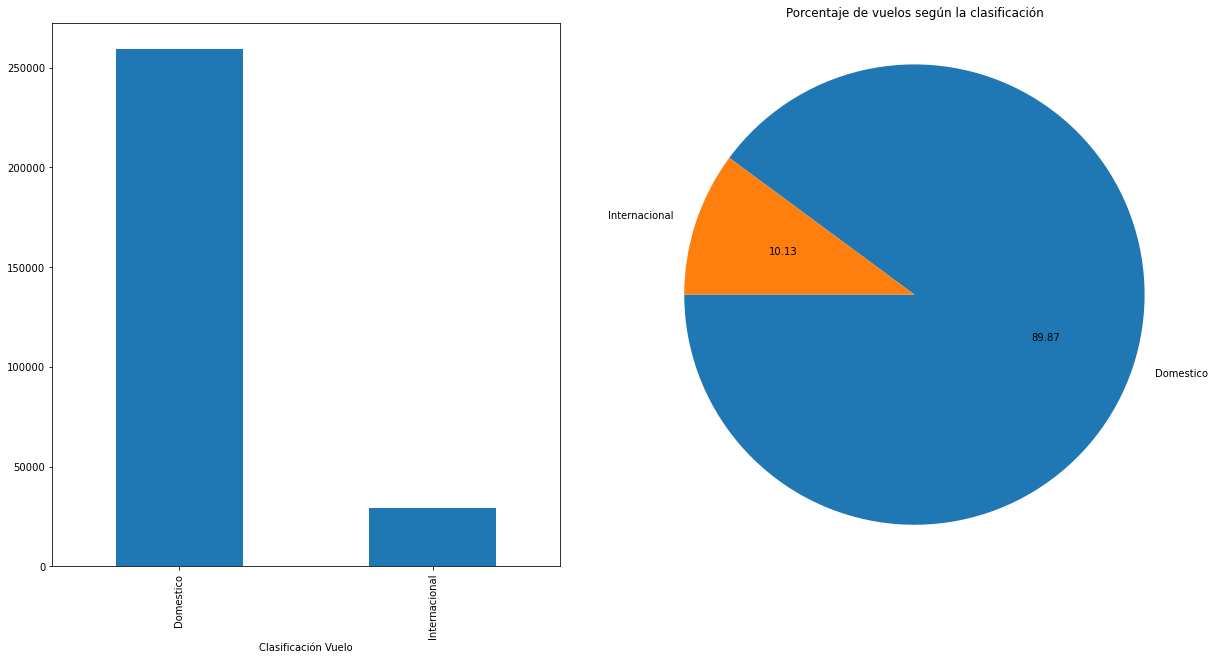

In [4]:
##En éste gráfico muestro la cantidad de vuelo y el porcentaje que represeta de vuelos
cantidadVuelos=vuelosArgentina.groupby("Clasificación Vuelo")["Clase de Vuelo (todos los vuelos)"].count()

dicVuelos=dict(cantidadVuelos)
lisVuelos=list(dicVuelos)
vuelos=[]
for i in dicVuelos:
    vuelos.append(dicVuelos[i])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cantidadVuelos.plot(kind="bar")
plt.subplot(1,2,2)
plt.pie(cantidadVuelos,labels=lisVuelos,autopct="%1.2f", startangle=180) #lisVuelos,vuelos)
plt.axis("equal")
plt.title("Porcentaje de vuelos según la clasificación")
plt.show()

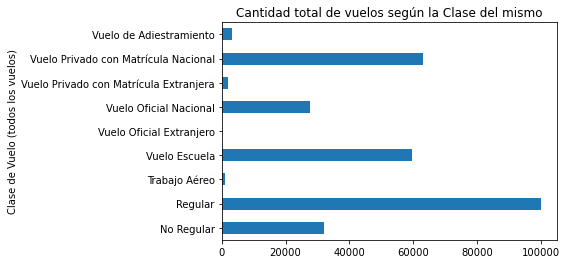

In [5]:
claseVuelos=vuelosArgentina.groupby("Clase de Vuelo (todos los vuelos)")["Fecha"].count()
plt.title("Cantidad total de vuelos según la Clase del mismo")
claseVuelos.plot(kind='barh')
plt.show()

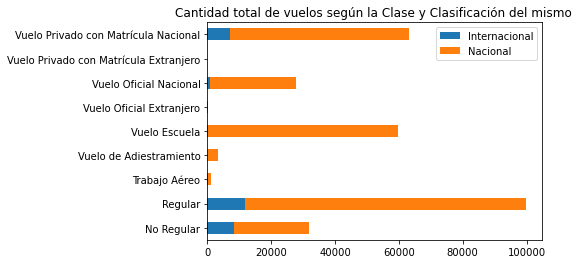

In [6]:
indice=["No Regular","Regular","Trabajo Aéreo","Vuelo de Adiestramiento","Vuelo Escuela","Vuelo Oficial Extranjero","Vuelo Oficial Nacional","Vuelo Privado con Matrícula Extranjero","Vuelo Privado con Matrícula Nacional"]
filtroInternacional=vuelosArgentina["Clasificación Vuelo"]=="Internacional"
auxiliarInternacional=vuelosArgentina[filtroInternacional]
vuelosInternacionales=auxiliarInternacional.groupby("Clase de Vuelo (todos los vuelos)")["Fecha"].count()

filtroNacional=vuelosArgentina["Clasificación Vuelo"]=="Domestico"
auxiliarNacional=vuelosArgentina[filtroNacional]
vuelosNacionales=auxiliarNacional.groupby("Clase de Vuelo (todos los vuelos)")["Fecha"].count()
tablaGeneral=pd.DataFrame({"Internacional":vuelosInternacionales,"Nacional":vuelosNacionales},index=indice)
tablaGeneral.plot(kind="barh",stacked=True)
plt.title("Cantidad total de vuelos según la Clase y Clasificación del mismo ")
plt.show()

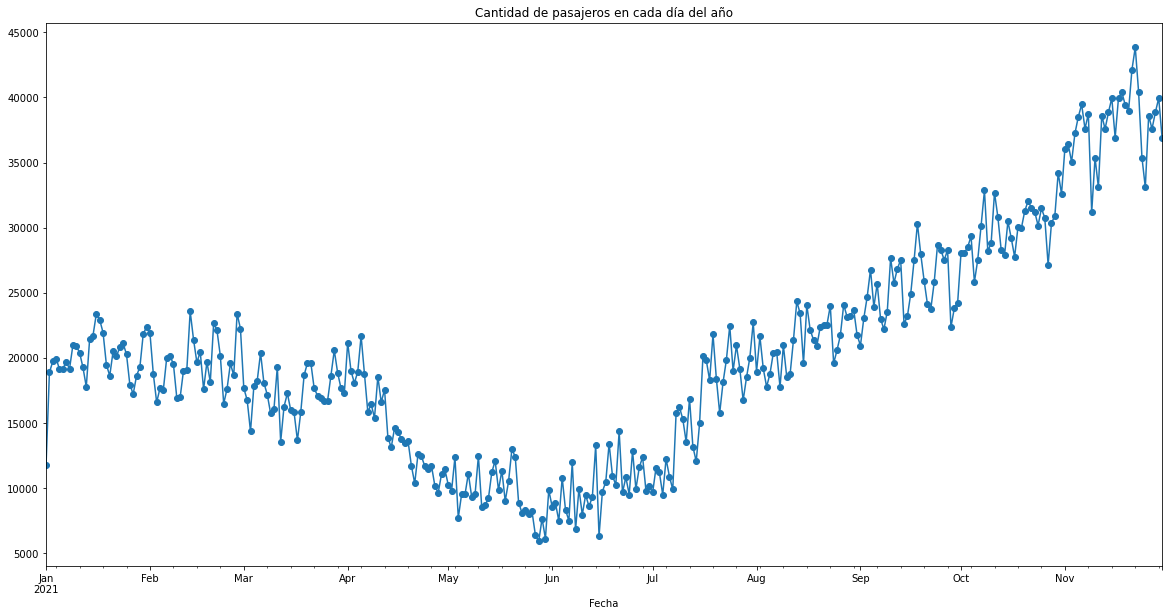

In [8]:
pasajerosAeropuerto=vuelosArgentina.groupby("Fecha")['Pasajeros'].sum()
pasajerosAeropuerto.plot(kind="line",figsize=(20,10),marker="o")
plt.title("Cantidad de pasajeros en cada día del año")
plt.show()

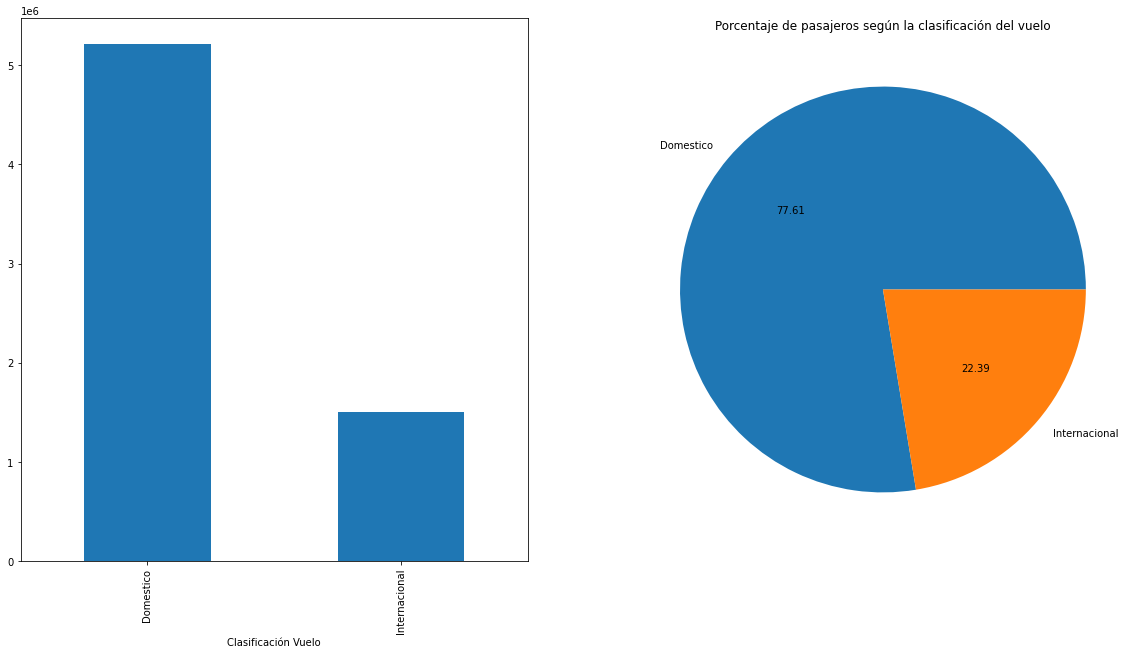

In [9]:
cantidadPasajeros=vuelosArgentina.groupby("Clasificación Vuelo")["Pasajeros"].sum()

dicPasajeros=dict(cantidadPasajeros)
listPasajeros=list(dicPasajeros)
pasajeros=[]
for i in dicPasajeros:
    pasajeros.append(dicPasajeros[i])
    
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cantidadPasajeros.plot(kind="bar")
plt.subplot(1,2,2)
plt.pie(cantidadPasajeros,labels=listPasajeros,autopct="%1.2f")
plt.title("Porcentaje de pasajeros según la clasificación del vuelo")
plt.show()

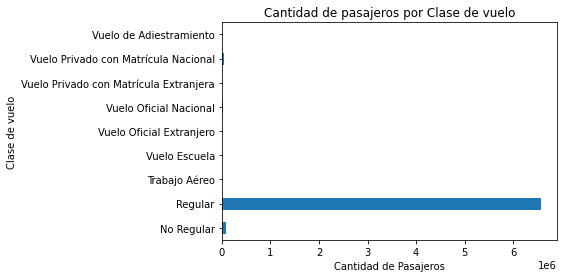

In [10]:
pasajerosClaseVuelo=vuelosArgentina.groupby("Clase de Vuelo (todos los vuelos)")["Pasajeros"].sum()
pasajerosClaseVuelo.plot(kind="barh")##,figsize=(20,10))
plt.title("Cantidad de pasajeros por Clase de vuelo")
plt.xlabel("Cantidad de Pasajeros")
plt.ylabel("Clase de vuelo")
plt.show()

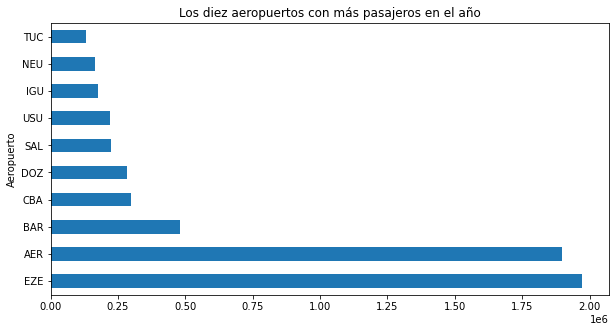

In [12]:
pasajerosAeropuertos=vuelosArgentina.groupby("Aeropuerto")["Pasajeros"].sum().nlargest(10)
pasajerosAeropuertos.plot(kind="barh",figsize=(10,5))
plt.title("Los diez aeropuertos con más pasajeros en el año")
plt.show()

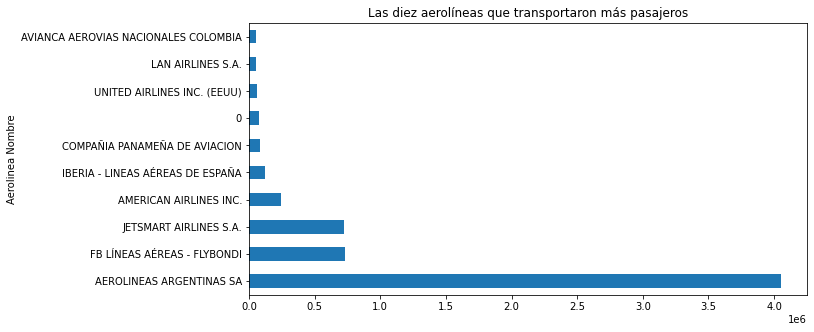

In [11]:
pasajerosAerolineas=vuelosArgentina.groupby("Aerolinea Nombre")["Pasajeros"].sum().nlargest(10)
pasajerosAerolineas.plot(kind="barh",figsize=(10,5))
plt.title("Las diez aerolíneas que transportaron más pasajeros")
plt.show()

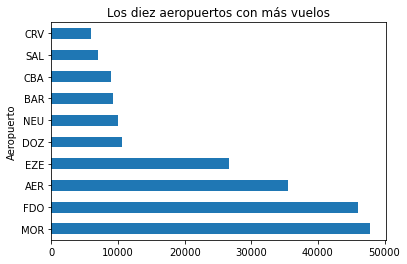

In [13]:
aeropuertosVuelos=vuelosArgentina.groupby("Aeropuerto")["Clasificación Vuelo"].count().nlargest(10)
aeropuertosVuelos.plot(kind="barh") ##,figsize=(20,10)); ##stacked='True'
plt.title("Los diez aeropuertos con más vuelos")
plt.show()

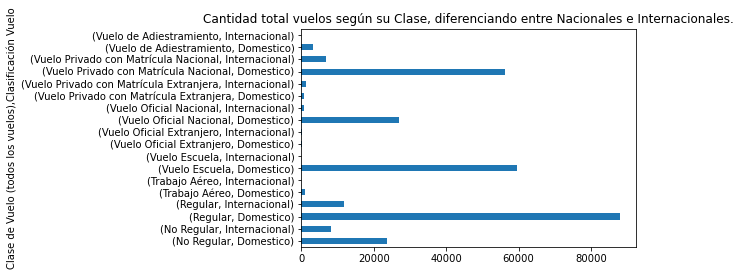

In [14]:
claseVuelo=vuelosArgentina.groupby(["Clase de Vuelo (todos los vuelos)","Clasificación Vuelo"])["Fecha"].count()
claseVuelo.plot(kind="barh",stacked=True)
plt.title("Cantidad total vuelos según su Clase, diferenciando entre Nacionales e Internacionales.")
plt.show()